# Dataset

 https://archive.ics.uci.edu/ml/datasets/Auto+MPG


In [1]:
# import platform, sys
# platform.architecture(), sys.maxsize
# import torch
# torch.__version__
# torch.cuda.is_available()
# ! nvidia-smi

# 1. Loading Libraries


In [2]:
import os
print(os.getcwd())

c:\DEV\ML_GforG\ML Projects\GfG_ML_in_nutshell\myFolder


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Importing data


In [4]:
names = ['spg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear',
'origin', 'carname']

df = pd.read_csv("../data/raw/auto-mpg.data", sep = '\s+', header = None, names = names)

df.head()

,spg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
df.to_csv("../data/processed/auto_mpg.csv", index = False)

In [6]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   carname       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


spg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

## 3. Data cleaning

In [7]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [8]:
#trimming rows with wrong data filer-> df['horsepower'] != "?"
df = df[df['horsepower'] != "?"]

#conersion of datatype from string to float for horsepower
df.horsepower = pd.to_numeric(df.horsepower)



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   modelyear     392 non-null    int64  
 7   origin        392 non-null    int64  
 8   carname       392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_15432\485491450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = plt.cm.Reds,annot = True)


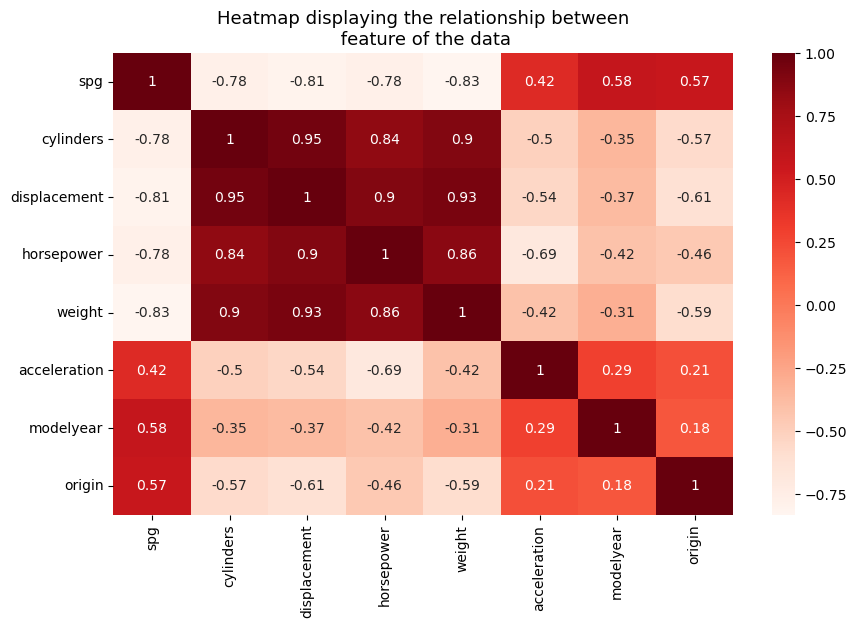

In [10]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),cmap = plt.cm.Reds,annot = True)

plt.title("Heatmap displaying the relationship between\n feature of the data",fontsize = 13)

plt.show()

In [11]:
from scipy.stats import boxcox

df['weight']  = df[['weight']].apply(lambda x : boxcox(x)[0])

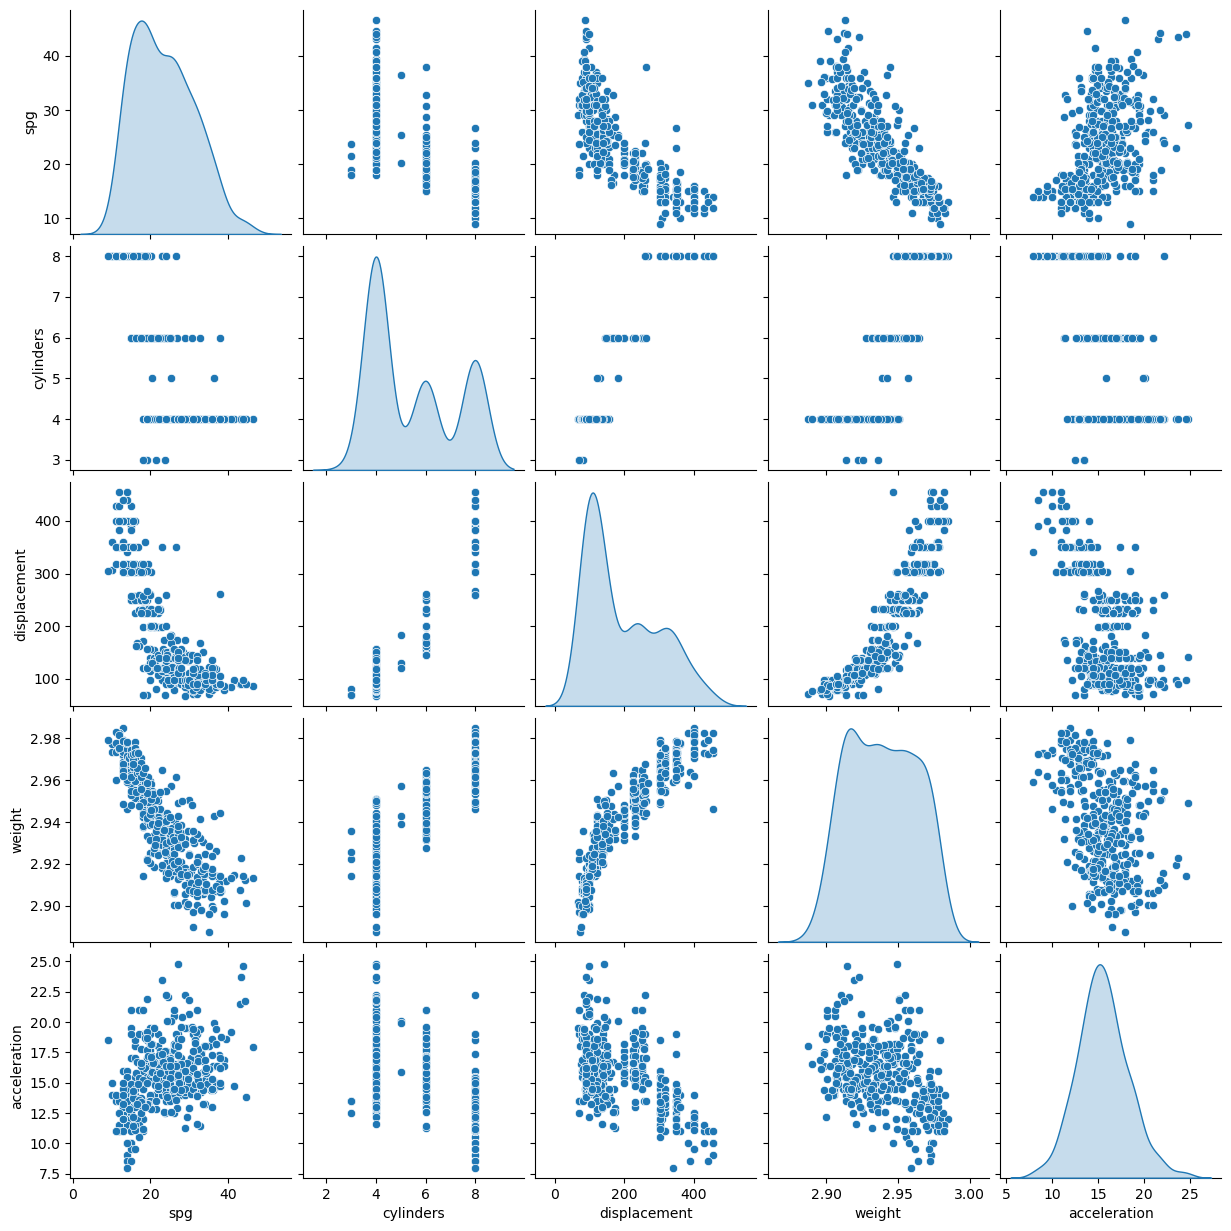

In [12]:
sns.pairplot(df[["spg", "cylinders",'displacement','weight','acceleration']], diag_kind="kde")

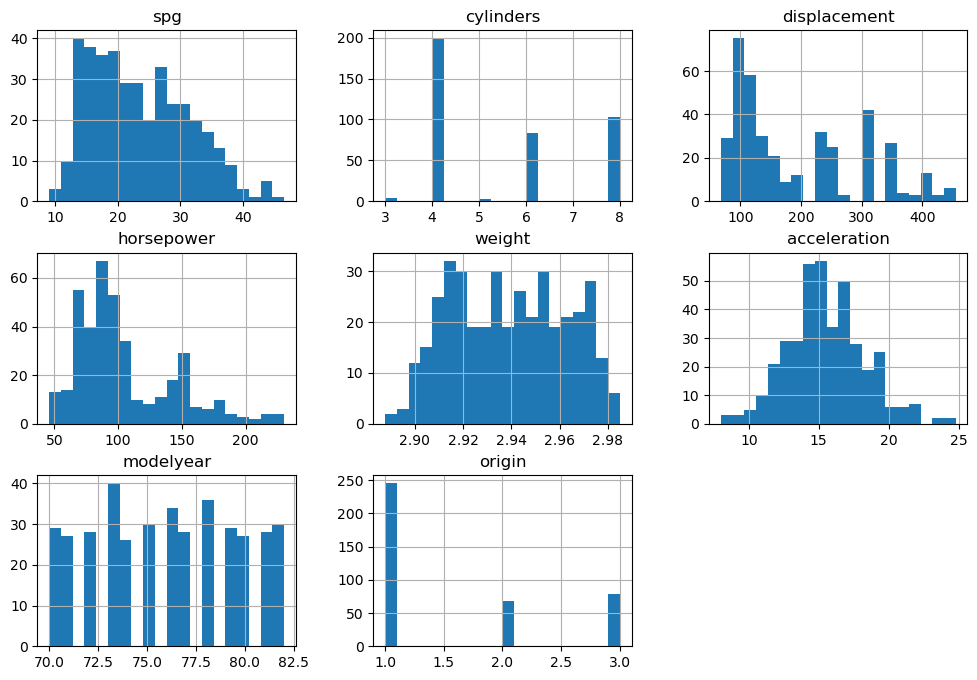

In [13]:
df.hist(figsize=(12,8),bins=20)
plt.show()



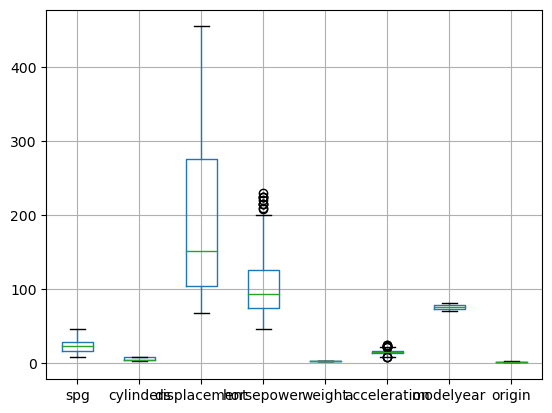

In [14]:
df.boxplot()
plt.show()

In [15]:
df = df.dropna(axis=0)

In [16]:
X = df.drop(["carname","spg"],axis = 1, inplace = False)
Y = df[["spg"]]

X.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,8,307.0,130.0,2.956599,12.0,70,1
1,8,350.0,165.0,2.960694,11.5,70,1
2,8,318.0,150.0,2.955054,11.0,70,1
3,8,304.0,150.0,2.954985,12.0,70,1
4,8,302.0,140.0,2.955353,10.5,70,1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)


In [18]:
print("X_train.shape" , X_train.shape,"Y_train.shape" , Y_train.shape,"X_test.shape" , X_test.shape,"Y_test.shape" , Y_test.shape, sep = "\n")


X_train.shape
(274, 7)
Y_train.shape
(274, 1)
X_test.shape
(118, 7)
Y_test.shape
(118, 1)


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

In [20]:
rf.fit(X_train,Y_train)

C:\Users\User\AppData\Local\Temp\ipykernel_15432\1283773718.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestRegressor(random_state=42)

In [21]:
Y_pred = rf.predict(X_test)

In [22]:
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(Y_test,Y_pred))

MAE 1.8080762711864398


In [23]:
import pickle

pickle_out = open("Regressor.pkl","wb")
pickle.dump(rf, pickle_out)
pickle_out.close()